Assignment 4  - OLS regression

For each data set in Assignment4_linear_regression_data.xlsx:

Create a scatter plot and visually decide if a linear model is appropriate (a matrix scatter plot will would be most efficient).

If the relation is not linear, transform the data accordingly.

Try logarithm, exponential, square root, square, etc., for X and/or Y until you see a linear relation. You only need to report what is the transformation chosen, not all the attempts. Note: most of the time, you can guess visually. A systematic way is to create a matrix scatter plot of the different transformations. A generic way we did not cover is to use a Box-Cox transformation.
Create an OLS model for the original and transformed data if required.

Evaluate if the OLS assumptions are met: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate.

Comment how the transformation impacted the different assumptions. (This should be done only by looking at the output diagnostic charts created by the software)

If datasets have outliers, remove the outliers and see the effect in the model (slope, intercept and R-square)
The output of the assignment should be:

OLS full report for the original and transformed data if appropriate (only two datasets should need transformation).

A short comment on the validity of the linear assumptions for the original and transformed data set when appropriate (it should not need to be longer than a couple of sentences).

An interpretation of the slope and intercept in relation to the original data, i.e. if the model is linear [intercept value] is the expected value when the independent variable is zero, etc.). If the model is not linear, you need to transform the equation back to its original form.

Check out the following if you need further guidance: http://www.bzst.com/2009/09/interpreting-log-transformed-variables.html 

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqhow-do-i-interpret-a-regression-model-when-some-variables-are-log-transformed/ 

https://stats.idre.ucla.edu/sas/faq/how-can-i-interpret-log-transformed-variables-in-terms-of-percent-change-in-linear-regression/ 

https://stats.stackexchange.com/questions/266722/interpretation-of-linear-regression-results-where-dependent-variable-is-transfor 

If the dataset have outliers, determine if the outlier have leverage or not by comparing the OLS with and without the outliers

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv("2016.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.0+ KB


In [5]:
df.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


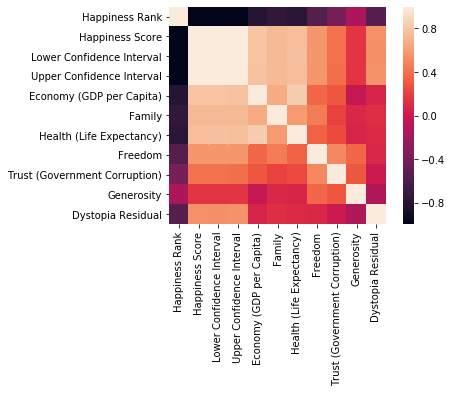

In [6]:
corrmat = df.corr()
sns.heatmap(corrmat, square=True)

Text(0, 0.5, 'Freedom')

<Figure size 432x288 with 0 Axes>

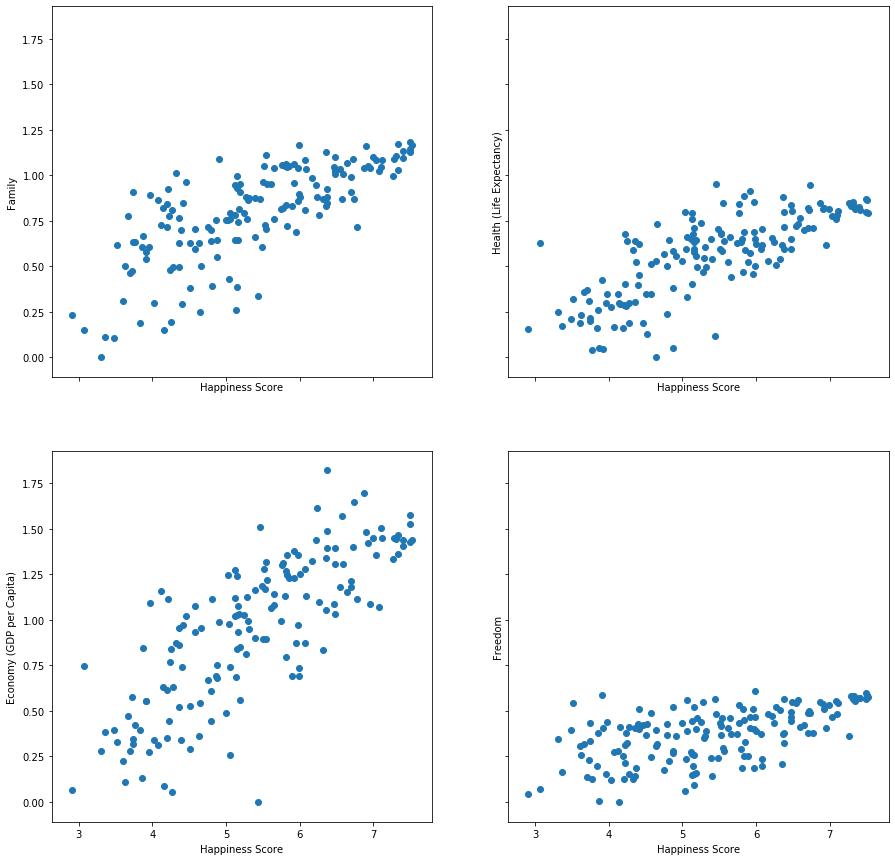

In [7]:
f = plt.figure()
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = True,figsize=(15,15))

axes[0][0].scatter(df['Happiness Score'],df['Family'], marker = "o")
axes[0][0].set_xlabel('Happiness Score', labelpad = 5)
axes[0][0].set_ylabel('Family', labelpad = 5)

axes[0][1].scatter(df['Happiness Score'],df['Health (Life Expectancy)'], marker = "o")
axes[0][1].set_xlabel('Happiness Score', labelpad = 5)
axes[0][1].set_ylabel('Health (Life Expectancy)', labelpad = 5)

axes[1][0].scatter(df['Happiness Score'],df['Economy (GDP per Capita)'], marker = "o")
axes[1][0].set_xlabel('Happiness Score', labelpad = 5)
axes[1][0].set_ylabel('Economy (GDP per Capita)', labelpad = 5)

axes[1][1].scatter(df['Happiness Score'],df['Freedom'], marker = "o")
axes[1][1].set_xlabel('Happiness Score', labelpad = 5)
axes[1][1].set_ylabel('Freedom', labelpad = 5)

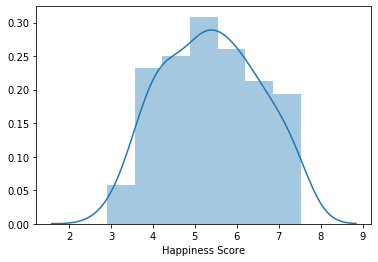

In [8]:
sns.distplot(df['Happiness Score'])

In [9]:
y = df['Happiness Score']
X = df.drop(['Happiness Score', 'Happiness Rank', 'Country', 'Region','Lower Confidence Interval','Upper Confidence Interval','Dystopia Residual'], axis=1)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [0.47770534 1.40284622 1.96615179 1.02785449 0.91059489 0.25735747]


In [11]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

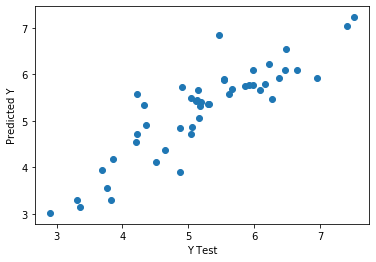

In [12]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [13]:
from patsy import dmatrices
import statsmodels.api as sm

In [14]:
model = sm.OLS(y,X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:        Happiness Score   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              1191.
Date:                Thu, 18 Jul 2019   Prob (F-statistic):                   2.01e-124
Time:                        20:39:09   Log-Likelihood:                         -186.04
No. Observations:                 157   AIC:                                      384.1
Df Residuals:                     151   BIC:                                      402.4
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------